# Python Screening Assignment

## Q1. Create a function in python to read the text file and replace specific content of the file.</b>
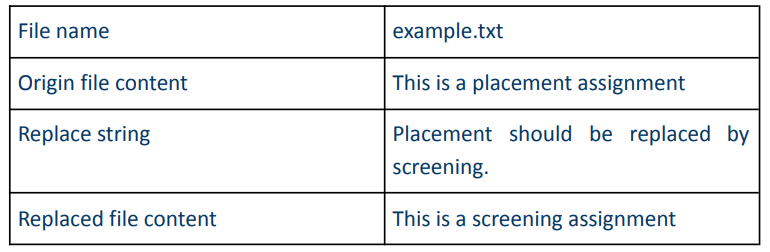

In [1]:
search_text = "placement"
replace_text = "screening"
file_name = r'example.txt'
def file_operation(file_name,search_text,replace_text):
    try:
        with open(file_name, 'r+') as file:
            data = file.read()
            print(data)
            if search_text in data:
                data = data.replace(search_text, replace_text)
            print(data)
        with open(file_name, 'w') as file:
            file.write(data)
    except Exception as e:
        print(e)
file_operation(file_name,search_text,replace_text)

This is screening assignment
This is screening assignment


## Q2. Demonstrate use of abstract class, multiple inheritance and decorator in python using examples.

### Abstract Class:

A class is called an Abstract class if it contains one or more abstract methods. An abstract method is a method that is declared, but contains no implementation. Abstract classes may not be instantiated, and its abstract methods must be implemented by its subclasses. An abstract class should not be instantiated.

<b>Abstract base classes</b> ABCs introduce virtual subclasses, which are classes that don’t inherit from a class but are still recognized.

'abc' works by marking methods of the <b>base class </b>as <b><u>abstract </u></b>. This is done by <b>@absttractmethod </b>decorator. A concrete class which is a sub class of such abstract base class then implements the abstract base by overriding its abstract methods.

The <b>abc module</b> defines <b>ABCMetaclass</b> which is a metaclass for defining abstract base class.

<b><u>Note:</u></b> In python, we will not get an error if we try to instantiate it. However, in languages like Java, C++, C# you will get an error if you try to instantiate an abstract class.

### What is the use of Abstract class and Abstract method.

If an abstract class should never be instantiated, then what is the use of such a class? The only way we can use an abstract class is to make other classes inherit from the abstract class. An abstract class is meant to be sub classed.

<b> E.g. </b>Consider online Purchase Senario, All products must have a <b>return_policy()</b> method which will display the number of days within which the products have to be returned.

Now each type of product will have its own <b>return_policy()</b>, so we will override the <b>return_policy()</b> in each of the child classes.

Since the <b>return_policy()</b> is overridden in each of the child classes, the parent class <b>return_policy()</b> is never used and hence it becomes redundant.

Let us say we want to add a new type of product, say <b>Furniture</b>. We can create a <b>Furniture class</b> and make it inherit the <b>Product class. </b>

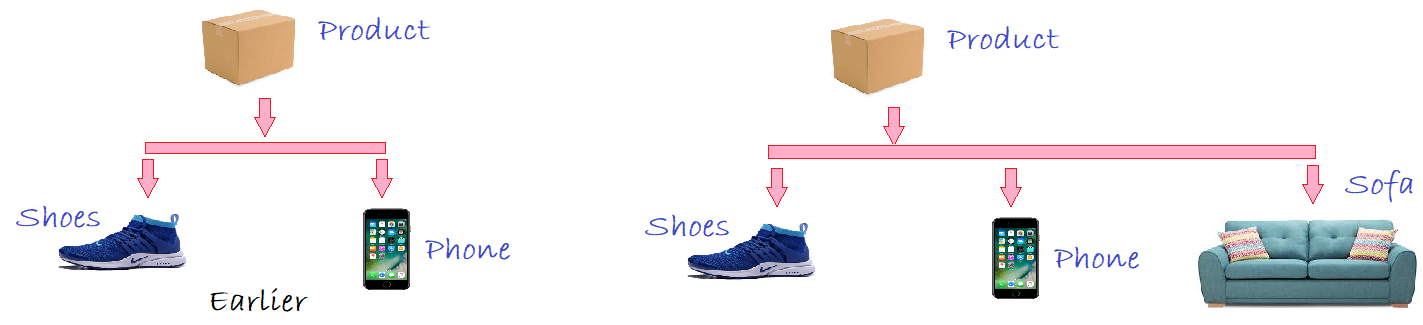

By mistake we have forgotten to override the <b>return_policy()</b> in the Furniture class. If someone tries to find the <b>return_policy()</b> of furniture by invoking the method, it will invoke the redundant <b>return_policy()</b> of the parent(i.e. <b> Product</b> Class).

How can we <b>ensure</b> that all subclasses of the Product class must mandatorily override the <b>return_policy()?</b>

<b> <u>Example :</u> To illustate the requirement of abstract method.</b>

In [2]:
from abc import ABCMeta
class Product(metaclass = ABCMeta):
    def return_policy(self):
        print("Default return Policy")
class Furniture(Product):
    pass
class Mobile(Product):
    def return_policy(self):
        print("All mobiles must be returned within 10 days of purchase")
class Shoe(Product):
    def return_policy(self):
        print("All shoes must be returned within 7 days of purchase")
a = Shoe()
a.return_policy()
b = Mobile()
b.return_policy()
c = Furniture()
c.return_policy()
#Product()

All shoes must be returned within 7 days of purchase
All mobiles must be returned within 10 days of purchase
Default return Policy


If we programmatically declare our <b>return_policy()</b> of Product class as an <b>abstract method</b>, then every sub-class of Product class MUST override the abstract method.

<u><b>Notes:</b></u>
<ol><li> An abstract class should not be instantiated.</li>
    <li>An abstract class may contain 0 or many abstract methods.</li></ol>
    
<b> Even if one method is abstract, then we will get an error if we try to instantiate the class.</b>

#### METACLASS:

A <b>metaclass</b> is a class of a class. While a class defines how an instance of the class behaves, a metaclass, on the otherhand, defines, how a class behaves. Every class that we create in Python is an instance of a metaclass. 

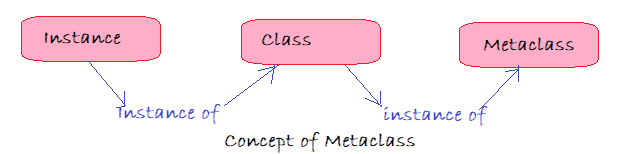

<b> Example: To illustrate the instantiation of abstract class.</b>

In [3]:
from abc import ABCMeta, abstractmethod
class Product(metaclass=ABCMeta):
    @abstractmethod
    def return_policy(self):
        pass
Product()

TypeError: Can't instantiate abstract class Product with abstract methods return_policy

If a method is abstract, then the Subclass must override the abstract method. Else we cannot instantiate the subclass also.

<b> Example: To illustrate the instantiation of child class where parent class is an abstract class.(Mandatory to override the abstract method.)</b>

In [4]:
from abc import ABCMeta, abstractmethod
class Product(metaclass=ABCMeta):
    @abstractmethod
    def return_policy(self):
        pass
class Furniture(Product):
    pass
Furniture()

TypeError: Can't instantiate abstract class Furniture with abstract methods return_policy

If a child class overrides the abstract method, then its own child classes need not override the abstract method.

<b> <u>Example :</u> To illustate the use of abstract method.</b>

In [5]:
from abc import ABCMeta, abstractmethod
class Product(metaclass=ABCMeta):
    @abstractmethod
    def return_policy(self):
        pass
class Furniture(Product):
    def return_policy(self):
        print("Furnitures cannot be returned")
class Sofa(Furniture):
    pass
s = Sofa()
s.return_policy()

Furnitures cannot be returned


In [6]:
from abc import ABCMeta
class Product(metaclass = ABCMeta):
    @abstractmethod
    def return_policy(self):
        pass
class Furniture(Product):
    def return_policy(self):
        print("All Furniture must be returned within 30 days of purchase")
class Mobile(Product):
    def return_policy(self):
        print("All mobiles must be returned within 10 days of purchase")
class Shoe(Product):
    def return_policy(self):
        print("All shoes must be returned within 7 days of purchase")
a = Shoe()
a.return_policy()
b = Mobile()
b.return_policy()
c = Furniture()
c.return_policy()

All shoes must be returned within 7 days of purchase
All mobiles must be returned within 10 days of purchase
All Furniture must be returned within 30 days of purchase


### Multiple inheritance

In [7]:
class Mother:
    mothername = "" # static variable/class variable
    def mother(self):
        print(self.mothername)
class Father:
    fathername = ""
    def father(self):
        print(self.fathername)
class Son(Mother, Father):
    def parents(self):
        print("Father :", self.fathername)
        print("Mother :", self.mothername)
s1 = Son()
s1.fathername = "RAM"
s1.mothername = "SITA"
s1.parents()

Father : RAM
Mother : SITA


### Decorator in python

<li>Decorators are a very powerful and useful tool in Python since it allows programmers to modify the behaviour of function or class. Decorators allow us to wrap another function in order to extend the behaviour of the wrapped function, without permanently modifying it. But before diving deep into decorators let us understand some concepts that will come in handy in learning the decorators.</li>

<li>Decorators are used to modify the behaviour of function or class.</li>
<li>In Decorators, functions are taken as the argument into another function and then called inside the wrapper function.</li>

In [8]:
def hello_decorator(func):
    def inner1():
        print("Hello, this is before function execution")
        func() 
        print("This is after function execution")         
    return inner1
def function_to_be_used():
    print("This is inside the function !!")
function_to_be_used = hello_decorator(function_to_be_used)
function_to_be_used()

Hello, this is before function execution
This is inside the function !!
This is after function execution


In [9]:
def hello_decorator(func):
    def inner1(*args, **kwargs):         
        print("before Execution")         
        returned_value = func(*args, **kwargs)
        print("after Execution")
        return returned_value         
    return inner1
@hello_decorator
def sum_two_numbers(a, b):
    print("Inside the function")
    return a + b 
a, b = 1, 2
print("Sum =", sum_two_numbers(a, b))

before Execution
Inside the function
after Execution
Sum = 3


### Chaining Decorators

In [10]:
def decor1(func):
    def inner():
        print("Inside the inner fuction of decor1")
        x = func()
        return x * x
    return inner 
def decor(func):
    def inner():
        print("Inside the inner fuction of decor")
        x = func()
        return 2 * x
    return inner 
@decor1
@decor
def num():
    return 10 
print(num())

Inside the inner fuction of decor1
Inside the inner fuction of decor
400
